In [5]:
import glob, pandas as pd
data = [{
  'date': pd.to_datetime(filename.split(' ')[0].lstrip('speeches/')),
  'speaker': filename.rstrip('.txt').split(' ', 1)[1],
  'text': open(filename, 'rb').readline().decode('cp1252')
} for filename in glob.glob('speeches/*.txt')]
speeches = pd.DataFrame(data)
speeches = speeches.set_index(['speaker', 'date'])
speeches.head()

,,text
speaker,date,
Richard Milhous Nixon,1970-04-30,Good evening my fellow Americans: Ten days ago...
Abraham Lincoln,1864-12-06,Fellow-Citizens of the Senate and House of Rep...
Bill Clinton,1998-08-17,Good evening. This afternoon in this room from...
Jimmy Carter,1978-01-19,Mr. President Mr. Speaker members of the 95th ...
Franklin Delano Roosevel,1941-03-15,This dinner of the White House Correspondents'...


# Task A
Choose a reasonable number of topics for this corpus. One way to think about topics is to consider the number of issues that may have been important in the past as well as those that may have come up over the centuries. Provide a brief explanation of how you chose this number.

In [6]:
N_TOPICS = 15

# Task B
Now perform a topic modeling exercise with LDA. Show the word distributions for each topic as well as topic distributions for each speech. Do you see any shifts over time? Explain.

In [7]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
  CountVectorizer(stop_words='english'),
  LDA(n_components=N_TOPICS, learning_method='batch', n_jobs=-1, max_iter=25, random_state=42)
).fit(speeches.text)

In [9]:
import numpy as np
n_words = 10
vocab = pipe.steps[0][1].get_feature_names()
topic_words = {}
for topic, comp in enumerate(pipe.steps[1][1].components_):   
    word_idx = np.argsort(comp)[::-1][:n_words]
    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]
pd.DataFrame(topic_words).T

,0,1,2,3,4,5,6,7,8,9
0,president,vietnam,think,south,mr,people,viet,nam,north,vietnamese
1,president,mr,think,people,say,going,don,ve,question,want
2,constitution,states,shall,slavery,united,state,union,congress,territory,people
3,germany,people,war,german,great,peace,conference,government,shall,united
4,world,people,nation,great,peace,men,freedom,new,america,man
5,press,gun,boats,newspaper,harbors,news,secret,marx,defence,newspapers
6,lebanon,israel,schedule,army,men,country,tariff,marines,union,beirut
7,pickett,stirred,studied,dalles,inconceivable,haste,aspect,familiar,incomparably,interpret
8,statute,trust,companies,business,capital,company,tobacco,common,purpose,court
9,states,government,united,public,great,country,congress,citizens,state,people


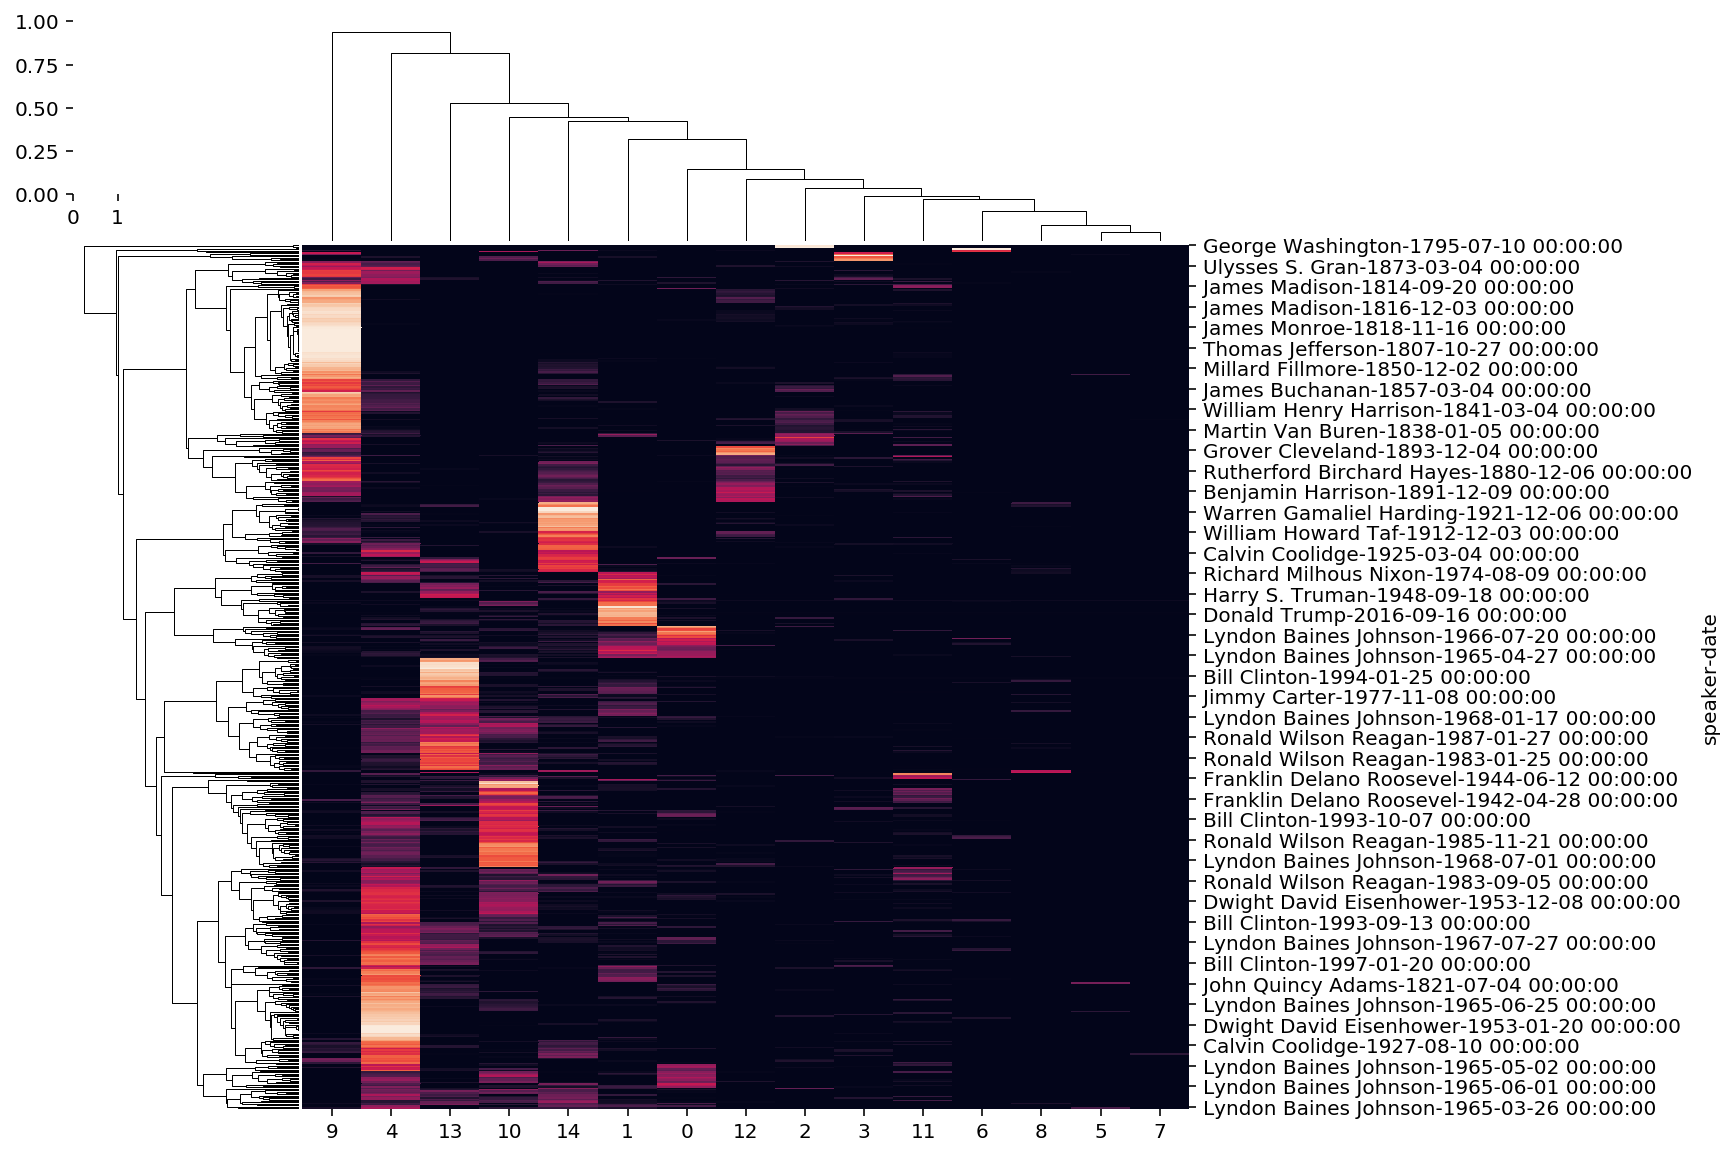

In [18]:
import matplotlib.pyplot as plt, seaborn as sns
x = pd.DataFrame(pipe.transform(speeches.text), index=speeches.index)
sns.clustermap(x, cbar=False)

# Task C
In terms of topics addressed “heavily” in a speech, which 3 former presidents does President Trump share the highest similarity with? How did you arrive at your conclusion?

In [44]:
np.argsort([1,1,-1])

array([2, 0, 1])

In [50]:
np.argsort(xx.values[0])

array([ 8, 24,  5, 13,  3, 12,  6, 35, 40, 38, 32, 15,  7, 33, 29, 10, 18,
        4, 17,  9, 26, 16, 42, 41, 37, 34, 31, 23, 28, 22, 30, 19,  1, 14,
       43, 36, 11, 21, 25, 20, 27, 39,  2,  0])

In [51]:
xx.values[0]

array([ 1.        ,  0.78335328,  0.86902991,  0.03071761,  0.32624357,
        0.00793447,  0.08983744,  0.17812757, -0.11902919,  0.41375534,
        0.26812464,  0.80946454,  0.03256792,  0.01867858,  0.79254412,
        0.1412553 ,  0.48049577,  0.34568388,  0.27201707,  0.77395158,
        0.82947393,  0.82084123,  0.76232716,  0.73421767, -0.00156187,
        0.82646683,  0.42175679,  0.84032029,  0.75917035,  0.24903681,
        0.76468572,  0.7280523 ,  0.12788996,  0.19115966,  0.67905781,
        0.11511098,  0.80777594,  0.66397947,  0.12428655,  0.86134196,
        0.12072715,  0.56740633,  0.48487029,  0.80134262])

In [64]:
xx = x.reset_index(1, True)
xx = xx.groupby(xx.index).mean().T.corr()
xx.loc[:] = [xx.columns[np.argsort(r)[::-1]] for r in xx.values]
xx.columns = range(len(xx))
xx

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
speaker,,,,,,,,,,,,,,,,,,,,,
Abraham Lincoln,Abraham Lincoln,Andrew Johnson,William Henry Harrison,John Quincy Adams,James Buchanan,John Adams,James Knox Polk,Franklin Pierce,Thomas Jefferson,Zachary Taylor,...,Warren Gamaliel Harding,William Howard Taf,Theodore Roosevel,Calvin Coolidge,George H. W. Bush,Barack Obama,George W. Bush,Bill Clinton,Jimmy Carter,Donald Trump
Andrew Jackson,Andrew Jackson,Martin Van Buren,George Washington,John Tyler,John Adams,James Madison,Franklin Pierce,James Monroe,Millard Fillmore,Zachary Taylor,...,Gerald Rudolph Ford,George W. Bush,Donald Trump,Lyndon Baines Johnson,Bill Clinton,Harry S. Truman,Ronald Wilson Reagan,Jimmy Carter,George H. W. Bush,Richard Milhous Nixon
Andrew Johnson,Andrew Johnson,James Knox Polk,John Adams,Franklin Pierce,William Henry Harrison,Zachary Taylor,Andrew Jackson,Martin Van Buren,John Quincy Adams,Thomas Jefferson,...,Lyndon Baines Johnson,Gerald Rudolph Ford,Ronald Wilson Reagan,Richard Milhous Nixon,George W. Bush,Barack Obama,Jimmy Carter,Bill Clinton,George H. W. Bush,Donald Trump
Barack Obama,Barack Obama,Bill Clinton,George W. Bush,Gerald Rudolph Ford,Jimmy Carter,George H. W. Bush,Ronald Wilson Reagan,Donald Trump,Richard Milhous Nixon,Harry S. Truman,...,Millard Fillmore,James Buchanan,Chester Alan Arthur,John Tyler,Ulysses S. Gran,Rutherford Birchard Hayes,William McKinley,Grover Cleveland,William Howard Taf,Benjamin Harrison
Benjamin Harrison,Benjamin Harrison,Grover Cleveland,William McKinley,Ulysses S. Gran,William Howard Taf,Chester Alan Arthur,Rutherford Birchard Hayes,Herbert Clark Hoover,Calvin Coolidge,James Abram Garfield,...,Gerald Rudolph Ford,Lyndon Baines Johnson,Jimmy Carter,Barack Obama,Donald Trump,George W. Bush,Bill Clinton,Ronald Wilson Reagan,Richard Milhous Nixon,George H. W. Bush
Bill Clinton,Bill Clinton,Barack Obama,George W. Bush,George H. W. Bush,Gerald Rudolph Ford,Jimmy Carter,Ronald Wilson Reagan,Richard Milhous Nixon,Donald Trump,John Fitzgerald Kennedy,...,Millard Fillmore,James Buchanan,John Tyler,Chester Alan Arthur,Rutherford Birchard Hayes,Ulysses S. Gran,William McKinley,Grover Cleveland,William Howard Taf,Benjamin Harrison
Calvin Coolidge,Calvin Coolidge,Theodore Roosevel,Warren Gamaliel Harding,Herbert Clark Hoover,William Howard Taf,Woodrow Wilson,James Abram Garfield,Franklin Delano Roosevel,Benjamin Harrison,William McKinley,...,James Buchanan,James Monroe,George Washington,Ronald Wilson Reagan,Richard Milhous Nixon,Barack Obama,George W. Bush,Bill Clinton,George H. W. Bush,Donald Trump
Chester Alan Arthur,Chester Alan Arthur,Benjamin Harrison,Grover Cleveland,Ulysses S. Gran,William McKinley,Rutherford Birchard Hayes,William Howard Taf,Franklin Pierce,John Quincy Adams,John Tyler,...,Franklin Delano Roosevel,George W. Bush,Jimmy Carter,Bill Clinton,Gerald Rudolph Ford,Harry S. Truman,Lyndon Baines Johnson,Ronald Wilson Reagan,George H. W. Bush,Richard Milhous Nixon
Donald Trump,Donald Trump,Barack Obama,Jimmy Carter,Bill Clinton,Richard Milhous Nixon,Ronald Wilson Reagan,George H. W. Bush,Harry S. Truman,George W. Bush,Gerald Rudolph Ford,...,Franklin Pierce,Andrew Johnson,William Howard Taf,James Abram Garfield,James Buchanan,Rutherford Birchard Hayes,Ulysses S. Gran,Grover Cleveland,Benjamin Harrison,William McKinley


# Task D
In terms of his own speeches, do you see President Trump shifting the emphasis on certain topics over time? Explain your response.

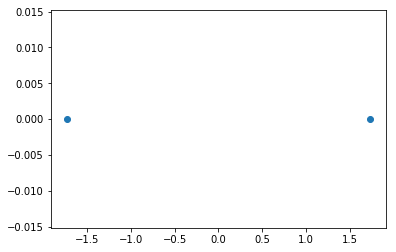

In [38]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
test = pd.DataFrame({'speaker':['Donald Trump','Donald Trump'],'Date':[pd.to_datetime('01/01/2018'),pd.to_datetime('02/01/2018')], 'Topic One':[.5,.1],'Topic Two': [.2,.04], 'Topic Three': [.1,1]})
col_order = ['Date','speaker']
col_order.extend(list(filter(lambda x: x not in ['Date','speaker'],test.columns)))

test = test[col_order]
topic_names = list(filter(lambda x: x not in ['Date','speaker'],test.columns))


#all topics compressed
data = StandardScaler().fit_transform(test[topic_names])
pca = PCA(n_components = 2)
d = pca.fit_transform(data)
import matplotlib.pyplot as plt
plt.scatter(d[:,0],d[:,1])
plt.show()


#top n topics
topics

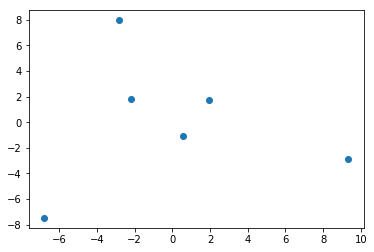

# Task E
If you do a K-means clustering with the same number of clusters as topics, do you see President Trump’s speeches and those of the 3 former presidents you identified in Task C in the same cluster? What was the basis of clustering (e.g., tf-idf, cosine similarity, etc.). Discuss your findings.

# Task F
Provide a visualization of both clusters (with colors) and cosine scores using MDS. 